# NBA 2022 Champion
## NBA league

- There are 30 teams in the NBA league and they are divided into East and West Conference (15 teams on each and the standings for each team are shown below)

- Each team will play 82 matches in total throughout the entire season

- The top 8 teams from each conference will advance to the playoff according to their win-lose record (the picture below shows the playoff tree)

- Each series will be held in the form of best of 7


<img src= "Western_Standings.png">

<img src= "Eastern_Standings.png">

<img src= "NBA2022_Playoff.png">

## Task

- There are only 2 teams left playing in the finals today (Golden State Warriors vs Boston Celtics)

- Our task will be getting the probability of ```Golden State Warriors``` to win 4 games and win the championship

- There are 2 datasets in total:
    1. The records of Golden State Warriors vs Boston Celtics during the season

    2. The NBA finals history record

There isn't any source provides the best dataset we are looking for therefore we made our own dataset based on the data that are retrieved from https://www.sofascore.com/tournament/basketball/usa/nba/132. <br>

The first dataset contain the dates when the matches are played, which teams are playing, the scores and a column with boolean value that will be true if the team we are interested in wins and false if it loses. <br>

The second dataset contains the year of season, the championship team, series record, total games needed to finish the series and finals MVP.

In [1]:
from cmdstanpy import CmdStanModel
import arviz as az
import numpy as np
import scipy.stats as stats
import pandas as pd
import statistics as s 
import seaborn as sns
from matplotlib.pyplot import figure

import matplotlib.pyplot as plt
import matplotlib as mpl

## Data

### Golden State Warriors vs Boston Celtics records

In [25]:
Matchup = pd.read_csv('Warriors_Boston.csv')
Matchup = Matchup.set_index('Match')
Matchup_Warriors = Matchup['Warriors']
Matchup

,Date,Teams,Score,Warriors,Boston
Match,,,,,
1,18/12/2021,Boston - Warriors,107 - 111,1,0
2,17/03/2021,Warriors - Boston,88 - 110,0,1


### Golden State Warriors playoff records

In [87]:
Warriors_Playoff = pd.read_csv('Warriors_Playoff.csv')
Warriors_Playoff = Warriors_Playoff.set_index('Match')
Warriors_Playoff

,Date,Teams,Score,Warriors
Match,,,,
1,17/04/2022,Warriors - Denver,123 - 107,1
2,19/04/2022,Warriors - Denver,126 - 106,1
3,22/04/2022,Denver - Warriors,113 - 118,1
4,24/04/2022,Denver - Warriors,126 - 121,0
5,28/04/2022,Warriors - Denver,102 - 98,1
6,01/05/2022,Memphis - Warriors,116 - 117,1
7,04/05/2022,Memphis - Warriors,106 - 101,0
8,08/05/2022,Warriors - Memphis,142 - 112,1
9,10/05/2022,Warriors - Memphis,101 - 98,1


### NBA finals history record

In [99]:
Final_history = pd.read_csv('Finals_record.csv')
Final_history = Final_history.set_index('Season')
Final_history

,Champions,Series,Games,Finals MVP
Season,,,,
1970,New York Knicks,4–3,7,Willis Reed
1971,Milwaukee Bucks,4–0,4,Lew Alcindor
1972,Los Angeles Lakers,4–1,5,Wilt Chamberlain
1973,New York Knicks,4–1,5,Willis Reed
1974,Boston Celtics,4–3,7,John Havlicek
1975,Golden State Warriors,4–0,4,Rick Barry
1976,Boston Celtics,4–2,6,Jo Jo White
1977,Portland Trail Blazers,4–2,6,Bill Walton
1978,Washington Bullets,4–3,7,Wes Unseld


## Models

```Model 1```
- there is one parameter (theta) which is the chance of the Golden State Warriors winning a game

- the data that will be used in this model is from the previous matchups between these two teams

- the model uses bernoulli distribution to calcuate the probability of the Golden State Warriors winning and losing one game

```Model 2```
- one additional parameter will be added (alpha) which is the number of games needed to win 4 games

- one additional data that will be used in this model is from the NBA finals history record

- the model also uses binomial distribution as the team has to win 4 out of 'alpha' games

## Prior Predictive Checks - Model 1
```theta```
- At first we would guess that any chance would be possible (uniform distribution)

- However according to their 82 games records throughout the whole season, Golden State Warriors has a winning percentage of 64.6% and Boston Celtics has 62.2%

- And also according to their playoff performance so far, Golden State Warriors has a winning percentage of 75% and Boston Celtics has 67%

- Therefore we are guessing the Golden State Warriors will have a slightly higher chance compared to the Boston Celtics like 65/35

- We use the beta distribution as the prior of this parameter with 𝛼 = 6.5 and 𝛽 = 3.5

In [6]:
with open ('model_1_ppc.stan', 'r') as file:
    print(file.read())

generated quantities {
   real theta = beta_rng(6.5,3.5);
   real y = bernoulli_rng(theta);
}


In [45]:
model_1_ppc = CmdStanModel(stan_file='model_1_ppc.stan')

model_1_ppc_result = model_1_ppc.sample(iter_sampling=1000,
                        iter_warmup=0,
                        chains=4,
                        fixed_param=True)

model_1_ppc_df = model_1_ppc_result.draws_pd()

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


Mean of theta prior = 0.650776127
Mean of y prior = 0.6465


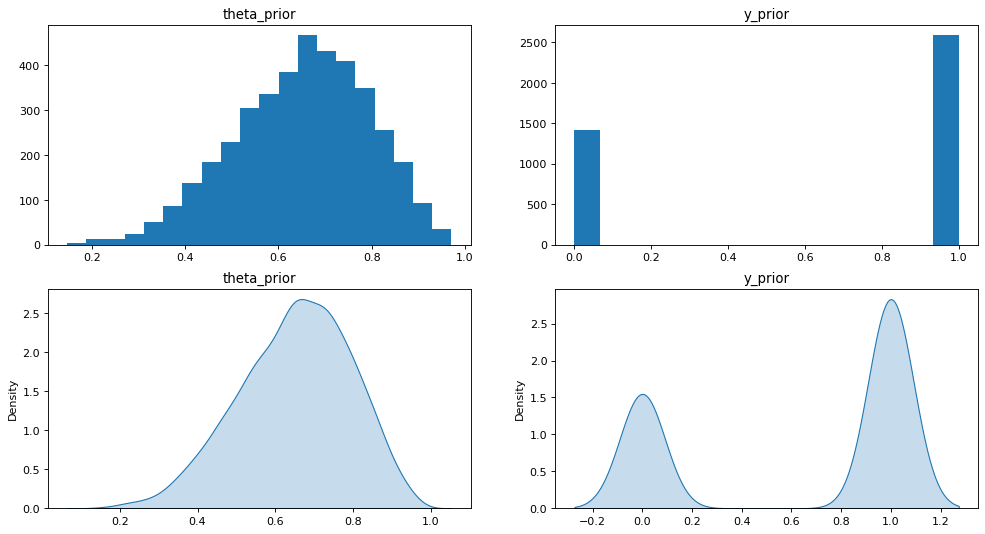

In [23]:
theta_prior = model_1_ppc_result.stan_variable('theta')
y_prior = model_1_ppc_result.stan_variable('y')

figure(figsize=(15, 8), dpi=80)

plt.subplot(2, 2, 1)
plt.hist(theta_prior, bins = 20)
plt.title('theta_prior')

plt.subplot(2, 2, 2)
plt.hist(y_prior, bins = 15)
plt.title('y_prior')

plt.subplot(2, 2, 3)
sns.kdeplot(theta_prior, shade = True)
plt.title('theta_prior')

plt.subplot(2, 2, 4)
sns.kdeplot(y_prior, shade = True)
plt.title('y_prior')

print("Mean of theta prior = " + str(theta_prior.mean()))
print("Mean of y prior = " + str(y_prior.mean()))

### Comments on Prior Predictive Check for Model 1

From the graphs and mean values shown above, we can see that:

- the parameter (theta) that is simulated from the prior we selected makes sense as we want the chance of Golden State Warriors to win to be 65% and we have here the mean value of theta_prior is 0.65

- the measurement (y) that is simulated from the prior we selected also make sense as we can see that the Golden State Warriors has higher density in winning (1) than losing (0) with the mean value of y_measure is 0.646

## Posterior Analysis - Model 1

In [50]:
model_1 = CmdStanModel(stan_file = 'model_1.stan')
model_1_fit = model_1.sample(data = {'N': len(Matchup_Warriors), 'y1': Matchup_Warriors})

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


Mean of theta model 1 = 0.6234085582500001
Mean of y model 1 = 0.625


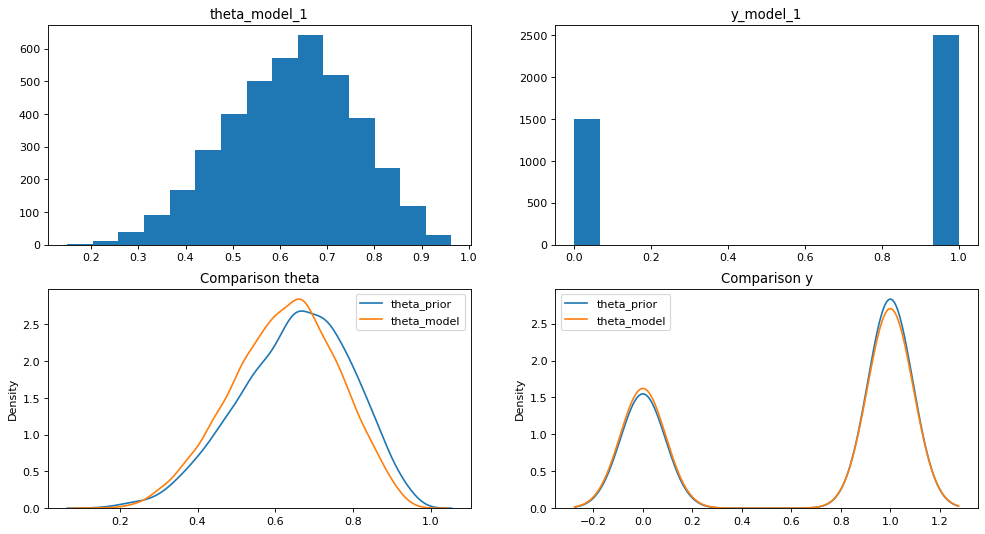

In [49]:
theta_model_1 = model_1_fit.stan_variable('theta')
y_model_1 = model_1_fit.stan_variable('y')

figure(figsize=(15, 8), dpi=80)

plt.subplot(2, 2, 1)
plt.hist(theta_model_1, bins = 15)
plt.title('theta_model_1')

plt.subplot(2, 2, 2)
plt.hist(y_model_1, bins = 15)
plt.title('y_model_1')

plt.subplot(2, 2, 3)
sns.kdeplot(theta_prior)
sns.kdeplot(theta_model_1)
plt.legend(['theta_prior', 'theta_model'])
plt.title('Comparison theta')

plt.subplot(2, 2, 4)
sns.kdeplot(y_prior)
sns.kdeplot(y_model_1)
plt.legend(['theta_prior', 'theta_model'])
plt.title('Comparison y')

print("Mean of theta model 1 = " + str(theta_model_1.mean()))
print("Mean of y model 1 = " + str(y_model_1.mean()))

### Comments on Posterior Analysis on Model 1

From the graphs and mean values shown above, we can see that:

- After adding the data of previous matchups between Golden State Warriors and Boston Celtics, the parameter (theta) shifted to the left and the mean value of theta_model_1 is 0.625

- This is because there are only two matches in the data and the Golden State Warriors won 1 and lost 1 which is 50%

- The density of y in winning (1) also decreases and losing (0) increases, it makes sense because the parameter (theta) which is the chance of winning decreases

## Prior Predictive Check - Model 2
```theta```
- At first we would guess that any chance would be possible (uniform distribution)

- However according to their 82 games records throughout the whole season, Golden State Warriors has a winning percentage of 64.6% and Boston Celtics has 62.2%

- And also according to their playoff performance so far, Golden State Warriors has a winning percentage of 75% and Boston Celtics has 67%

- Therefore we are guessing the Golden State Warriors will have a slightly higher chance compared to the Boston Celtics like 65/35

- We use the beta distribution as the prior of this parameter with 𝛼 = 6.5 and 𝛽 = 3.5